# Tutorial examples

## Conversions

The main purpose of aghast is to move aggregated, histogram-like statistics (called "ghasts") from one framework to the next. This requires a conversion of high-level domain concepts.

Consider the following example: in Numpy, a histogram is simply a 2-tuple of arrays with special meaning—bin contents, then bin edges.

In [1]:
import numpy

numpy_hist = numpy.histogram(numpy.random.normal(0, 1, int(10e6)), bins=80, range=(-5, 5))
numpy_hist

(array([     2,      5,      9,     15,     29,     49,     80,    104,
           237,    352,    555,    867,   1447,   2046,   3037,   4562,
          6805,   9540,  13529,  18584,  25593,  35000,  46024,  59103,
         76492,  96441, 119873, 146159, 177533, 210628, 246316, 283292,
        321377, 359314, 393857, 426446, 453031, 474806, 489846, 496646,
        497922, 490499, 473200, 453527, 425650, 393297, 358537, 321099,
        282519, 246469, 211181, 177550, 147417, 120322,  96592,  76665,
         59587,  45776,  34459,  25900,  18876,  13576,   9571,   6662,
          4629,   3161,   2069,   1334,    878,    581,    332,    220,
           135,     65,     39,     26,     19,     15,      4,      4]),
 array([-5.   , -4.875, -4.75 , -4.625, -4.5  , -4.375, -4.25 , -4.125,
        -4.   , -3.875, -3.75 , -3.625, -3.5  , -3.375, -3.25 , -3.125,
        -3.   , -2.875, -2.75 , -2.625, -2.5  , -2.375, -2.25 , -2.125,
        -2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 

We convert that into the aghast equivalent (a "ghast") with a connector (two-function module: `fromnumpy` and `tonumpy`).

In [2]:
import aghast

ghastly_hist = aghast.from_numpy(numpy_hist)
ghastly_hist

This object is instantiated from a class structure built from simple pieces.

In [3]:
ghastly_hist.dump()

Histogram(
  axis=[
    Axis(binning=RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0)))
  ],
  counts=
    UnweightedCounts(
      counts=
        InterpretedInlineInt64Buffer(
          buffer=
              [     2      5      9     15     29     49     80    104    237    352
                  555    867   1447   2046   3037   4562   6805   9540  13529  18584
                25593  35000  46024  59103  76492  96441 119873 146159 177533 210628
               246316 283292 321377 359314 393857 426446 453031 474806 489846 496646
               497922 490499 473200 453527 425650 393297 358537 321099 282519 246469
               211181 177550 147417 120322  96592  76665  59587  45776  34459  25900
                18876  13576   9571   6662   4629   3161   2069   1334    878    581
                  332    220    135     65     39     26     19     15      4      4])))


Now it can be converted to a ROOT histogram with another connector.

In [4]:
root_hist = aghast.to_root(ghastly_hist, "root_hist")
root_hist

Welcome to JupyROOT 6.17/01


<ROOT.TH1D object ("root_hist") at 0x55555e208ef0>

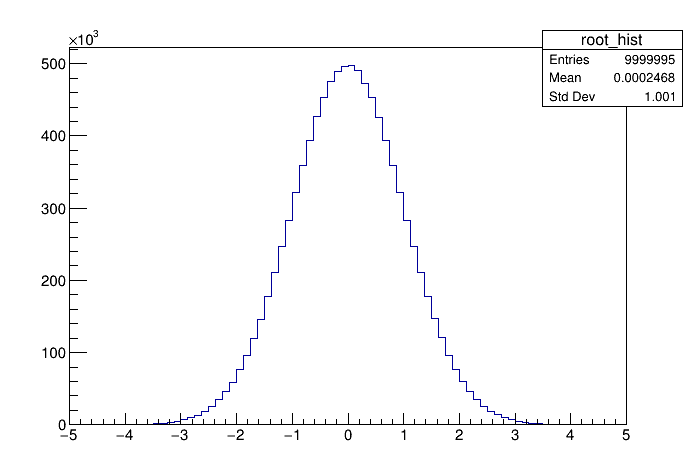

In [5]:
import ROOT
canvas = ROOT.TCanvas()
root_hist.Draw()
canvas.Draw()

And Pandas with yet another connector.

In [6]:
pandas_hist = aghast.to_pandas(ghastly_hist)
pandas_hist

,unweighted
"[-5.0, -4.875)",2
"[-4.875, -4.75)",5
"[-4.75, -4.625)",9
"[-4.625, -4.5)",15
"[-4.5, -4.375)",29
"[-4.375, -4.25)",49
"[-4.25, -4.125)",80
"[-4.125, -4.0)",104
"[-4.0, -3.875)",237
"[-3.875, -3.75)",352


## Serialization

A ghast is also a [Flatbuffers](http://google.github.io/flatbuffers/) object, which has a [multi-lingual](https://google.github.io/flatbuffers/flatbuffers_support.html), [random-access](https://github.com/mzaks/FlatBuffersSwift/wiki/FlatBuffers-Explained), [small-footprint](http://google.github.io/flatbuffers/md__benchmarks.html) serialization:

In [7]:
ghastly_hist.tobuffer()

bytearray(b"\x04\x00\x00\x00\x90\xff\xff\xff\x10\x00\x00\x00\x00\x01\n\x00\x10\x00\x0c\x00\x0b\x00\x04\x00\n\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x01\x04\x00\x00\x00\x01\x00\x00\x00\x0c\x00\x00\x00\x08\x00\x0c\x00\x0b\x00\x04\x00\x08\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x02\x08\x00(\x00\x1c\x00\x04\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\xc0\x00\x00\x00\x00\x00\x00\x14@\x01\x00\x00\x00\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\n\x00\t\x00\x04\x00\x08\x00\x00\x00\x0c\x00\x00\x00\x00\x02\x06\x00\x08\x00\x04\x00\x06\x00\x00\x00\x04\x00\x00\x00\x80\x02\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\x0f\x00\x00\x00\x00\x00\x00\x00\x1d\x00\x00\x00\x00\x00\x00\x001\x00\x00\x00\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00h\x00\x00\x00\x00\x00\x00\x00\xed\x00\x00\x00\x00\x00\x00\x00`\x01\x00\x00\x00\x00\x00\x00+\x02\x00\x00\x00\x00\x00\x00c\x03\x00\x00\x00\x00\x00\x00\xa7\x05\x00\x00\x00\x00\x00\x00\xfe

In [8]:
print("Numpy size: ", numpy_hist[0].nbytes + numpy_hist[1].nbytes)

tmessage = ROOT.TMessage()
tmessage.WriteObject(root_hist)
print("ROOT size:  ", tmessage.Length())

import pickle
print("Pandas size:", len(pickle.dumps(pandas_hist)))

print("Aghast size: ", len(ghastly_hist.tobuffer()))

Numpy size:  1288
ROOT size:   1962
Pandas size: 2984
Aghast size:  792


Aghast is generally forseen as a memory format, like [Apache Arrow](https://arrow.apache.org), but for statistical aggregations. Like Arrow, it reduces the need to implement $N(N - 1)/2$ conversion functions among $N$ statistical libraries to just $N$ conversion functions. (See the figure on Arrow's website.)

## Translation of conventions

Aghast also intends to be as close to zero-copy as possible. This means that it must make graceful translations among conventions. Different histogramming libraries handle overflow bins in different ways:

In [9]:
fromroot = aghast.from_root(root_hist)
fromroot.axis[0].binning.dump()
print("Bin contents length:", len(fromroot.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.below1, loc_overflow=BinLocation.above1))
Bin contents length: 82


In [10]:
ghastly_hist.axis[0].binning.dump()
print("Bin contents length:", len(ghastly_hist.counts.array))

RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0))
Bin contents length: 80


And yet we want to be able to manipulate them as though these differences did not exist.

In [11]:
sum_hist = fromroot + ghastly_hist

In [12]:
sum_hist.axis[0].binning.dump()
print("Bin contents length:", len(sum_hist.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.above1, loc_overflow=BinLocation.above2))
Bin contents length: 82


The binning structure keeps track of the existence of underflow/overflow bins and where they are located.

   * ROOT's convention is to put underflow before the normal bins (`below1`) and overflow after (`above1`), so that the normal bins are effectively 1-indexed.
   * Boost.Histogram's convention is to put overflow after the normal bins (`above1`) and underflow after that (`above2`), so that underflow is accessed via `myhist[-1]` in Numpy.
   * Numpy histograms don't have underflow/overflow bins.
   * Pandas could have `Intervals` that extend to infinity.

Aghast accepts all of these, so that it doesn't have to manipulate the bin contents buffer it receives, but knows how to deal with them if it has to combine histograms that follow different conventions.

## Binning types

All the different axis types have an equivalent in aghast (and not all are single-dimensional).

In [13]:
aghast.IntegerBinning(5, 10).dump()
aghast.RegularBinning(100, aghast.RealInterval(-5, 5)).dump()
aghast.HexagonalBinning(0, 100, 0, 100, aghast.HexagonalBinning.cube_xy).dump()
aghast.EdgesBinning([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]).dump()
aghast.IrregularBinning([aghast.RealInterval(0, 5),
                         aghast.RealInterval(10, 100),
                         aghast.RealInterval(-10, 10)],
                       overlapping_fill=aghast.IrregularBinning.all).dump()
aghast.CategoryBinning(["one", "two", "three"]).dump()
aghast.SparseRegularBinning([5, 3, -2, 8, -100], 10).dump()
aghast.FractionBinning(error_method=aghast.FractionBinning.clopper_pearson).dump()
aghast.PredicateBinning(["signal region", "control region"]).dump()
aghast.VariationBinning([aghast.Variation([aghast.Assignment("x", "nominal")]),
                         aghast.Variation([aghast.Assignment("x", "nominal + sigma")]),
                         aghast.Variation([aghast.Assignment("x", "nominal - sigma")])]).dump()

IntegerBinning(min=5, max=10)
RegularBinning(num=100, interval=RealInterval(low=-5.0, high=5.0))
HexagonalBinning(qmin=0, qmax=100, rmin=0, rmax=100, coordinates=HexagonalBinning.cube_xy)
EdgesBinning(edges=[0.01 0.05 0.1 0.5 1 5 10 50 100])
IrregularBinning(
  intervals=[
    RealInterval(low=0.0, high=5.0),
    RealInterval(low=10.0, high=100.0),
    RealInterval(low=-10.0, high=10.0)
  ],
  overlapping_fill=IrregularBinning.all)
CategoryBinning(categories=['one', 'two', 'three'])
SparseRegularBinning(bins=[5 3 -2 8 -100], bin_width=10.0)
FractionBinning(error_method=FractionBinning.clopper_pearson)
PredicateBinning(predicates=['signal region', 'control region'])
VariationBinning(
  variations=[
    Variation(assignments=[
        Assignment(identifier='x', expression='nominal')
      ]),
    Variation(
      assignments=[
        Assignment(identifier='x', expression='nominal + sigma')
      ]),
    Variation(
      assignments=[
        Assignment(identifier='x', expression='nomina

The meanings of these binning classes are given in [the specification](https://github.com/diana-hep/aghast/blob/master/specification.adoc#integerbinning), but many of them can be converted into one another, and converting to `CategoryBinning` (strings) often makes the intent clear.

In [14]:
aghast.IntegerBinning(5, 10).toCategoryBinning().dump()
aghast.RegularBinning(10, aghast.RealInterval(-5, 5)).toCategoryBinning().dump()
aghast.EdgesBinning([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]).toCategoryBinning().dump()
aghast.IrregularBinning([aghast.RealInterval(0, 5),
                         aghast.RealInterval(10, 100),
                         aghast.RealInterval(-10, 10)],
                       overlapping_fill=aghast.IrregularBinning.all).toCategoryBinning().dump()
aghast.SparseRegularBinning([5, 3, -2, 8, -100], 10).toCategoryBinning().dump()
aghast.FractionBinning(error_method=aghast.FractionBinning.clopper_pearson).toCategoryBinning().dump()
aghast.PredicateBinning(["signal region", "control region"]).toCategoryBinning().dump()
aghast.VariationBinning([aghast.Variation([aghast.Assignment("x", "nominal")]),
                         aghast.Variation([aghast.Assignment("x", "nominal + sigma")]),
                         aghast.Variation([aghast.Assignment("x", "nominal - sigma")])]).toCategoryBinning().dump()

CategoryBinning(categories=['5', '6', '7', '8', '9', '10'])
CategoryBinning(
  categories=['[-5, -4)', '[-4, -3)', '[-3, -2)', '[-2, -1)', '[-1, 0)', '[0, 1)', '[1, 2)', '[2, 3)', '[3, 4)', '[4, 5)'])
CategoryBinning(
  categories=['[0.01, 0.05)', '[0.05, 0.1)', '[0.1, 0.5)', '[0.5, 1)', '[1, 5)', '[5, 10)', '[10, 50)', '[50, 100)'])
CategoryBinning(categories=['[0, 5)', '[10, 100)', '[-10, 10)'])
CategoryBinning(categories=['[50, 60)', '[30, 40)', '[-20, -10)', '[80, 90)', '[-1000, -990)'])
CategoryBinning(categories=['pass', 'all'])
CategoryBinning(categories=['signal region', 'control region'])
CategoryBinning(categories=['x := nominal', 'x := nominal + sigma', 'x := nominal - sigma'])


This technique can also clear up confusion about overflow bins.

In [15]:
aghast.RegularBinning(5, aghast.RealInterval(-5, 5), aghast.RealOverflow(
    loc_underflow=aghast.BinLocation.above2,
    loc_overflow=aghast.BinLocation.above1,
    loc_nanflow=aghast.BinLocation.below1
    )).toCategoryBinning().dump()

CategoryBinning(
  categories=['{nan}', '[-5, -3)', '[-3, -1)', '[-1, 1)', '[1, 3)', '[3, 5)', '[5, +inf]', '[-inf, -5)'])


# Fancy binning types

You might also be wondering about `FractionBinning`, `PredicateBinning`, and `VariationBinning`.

`FractionBinning` is an axis of two bins: #passing and #total, #failing and #total, or #passing and #failing. Adding it to another axis effectively makes an "efficiency plot."

In [16]:
h = aghast.Histogram([aghast.Axis(aghast.FractionBinning()),
                      aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5)))],
                    aghast.UnweightedCounts(
                        aghast.InterpretedInlineBuffer.fromarray(
                            numpy.array([[  9,  25,  29,  35,  54,  67,  60,  84,  80,  94],
                                         [ 99, 119, 109, 109,  95, 104, 102, 106, 112, 122]]))))
df = aghast.to_pandas(h)
df

unweighted
pass [-5.0, -4.0)           9
     [-4.0, -3.0)          25
     [-3.0, -2.0)          29
     [-2.0, -1.0)          35
     [-1.0, 0.0)           54
     [0.0, 1.0)            67
     [1.0, 2.0)            60
     [2.0, 3.0)            84
     [3.0, 4.0)            80
     [4.0, 5.0)            94
all  [-5.0, -4.0)          99
     [-4.0, -3.0)         119
     [-3.0, -2.0)         109
     [-2.0, -1.0)         109
     [-1.0, 0.0)           95
     [0.0, 1.0)           104
     [1.0, 2.0)           102
     [2.0, 3.0)           106
     [3.0, 4.0)           112
     [4.0, 5.0)           122

In [17]:
df = df.unstack(level=0)
df

unweighted     
                    all pass
[-5.0, -4.0)         99    9
[-4.0, -3.0)        119   25
[-3.0, -2.0)        109   29
[-2.0, -1.0)        109   35
[-1.0, 0.0)          95   54
[0.0, 1.0)          104   67
[1.0, 2.0)          102   60
[2.0, 3.0)          106   84
[3.0, 4.0)          112   80
[4.0, 5.0)          122   94

In [18]:
df["unweighted", "pass"] / df["unweighted", "all"]

[-5.0, -4.0)    0.090909
[-4.0, -3.0)    0.210084
[-3.0, -2.0)    0.266055
[-2.0, -1.0)    0.321101
[-1.0, 0.0)     0.568421
[0.0, 1.0)      0.644231
[1.0, 2.0)      0.588235
[2.0, 3.0)      0.792453
[3.0, 4.0)      0.714286
[4.0, 5.0)      0.770492
dtype: float64

`PredicateBinning` means that each bin represents a predicate (if-then rule) in the filling procedure. Aghast doesn't _have_ a filling procedure, but filling-libraries can use this to encode relationships among histograms that a fitting-library can take advantage of, for combined signal-control region fits, for instance. It's possible for those regions to overlap: an input datum might satisfy more than one predicate, and `overlapping_fill` determines which bin(s) were chosen: `first`, `last`, or `all`.

`VariationBinning` means that each bin represents a variation of one of the paramters used to calculate the fill-variables. This is used to determine sensitivity to systematic effects, by varying them and re-filling. In this kind of binning, the same input datum enters every bin.

In [19]:
xdata = numpy.random.normal(0, 1, int(1e6))
sigma = numpy.random.uniform(-0.1, 0.8, int(1e6))

h = aghast.Histogram([aghast.Axis(aghast.VariationBinning([
                         aghast.Variation([aghast.Assignment("x", "nominal")]),
                         aghast.Variation([aghast.Assignment("x", "nominal + sigma")])])),
                     aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5)))],
                    aghast.UnweightedCounts(
                        aghast.InterpretedInlineBuffer.fromarray(
                            numpy.concatenate([
                                numpy.histogram(xdata, bins=10, range=(-5, 5))[0],
                                numpy.histogram(xdata + sigma, bins=10, range=(-5, 5))[0]]))))
df = aghast.to_pandas(h)
df

unweighted
x := nominal         [-5.0, -4.0)          31
                     [-4.0, -3.0)        1309
                     [-3.0, -2.0)       21624
                     [-2.0, -1.0)      135279
                     [-1.0, 0.0)       341683
                     [0.0, 1.0)        341761
                     [1.0, 2.0)        135675
                     [2.0, 3.0)         21334
                     [3.0, 4.0)          1273
                     [4.0, 5.0)            31
x := nominal + sigma [-5.0, -4.0)          14
                     [-4.0, -3.0)         559
                     [-3.0, -2.0)       10814
                     [-2.0, -1.0)       84176
                     [-1.0, 0.0)       271999
                     [0.0, 1.0)        367950
                     [1.0, 2.0)        209479
                     [2.0, 3.0)         49997
                     [3.0, 4.0)          4815
                     [4.0, 5.0)           193

In [20]:
df.unstack(level=0)

unweighted                     
             x := nominal x := nominal + sigma
[-5.0, -4.0)           31                   14
[-4.0, -3.0)         1309                  559
[-3.0, -2.0)        21624                10814
[-2.0, -1.0)       135279                84176
[-1.0, 0.0)        341683               271999
[0.0, 1.0)         341761               367950
[1.0, 2.0)         135675               209479
[2.0, 3.0)          21334                49997
[3.0, 4.0)           1273                 4815
[4.0, 5.0)             31                  193

## Collections

You can gather many objects (histograms, functions, ntuples) into a `Collection`, partly for convenience of encapsulating all of them in one object.

In [21]:
aghast.Collection({"one": fromroot, "two": ghastly_hist}).dump()

Collection(
  objects={
    'one': Histogram(
      axis=[
        Axis(
          binning=
            RegularBinning(
              num=80,
              interval=RealInterval(low=-5.0, high=5.0),
              overflow=RealOverflow(loc_underflow=BinLocation.below1, loc_overflow=BinLocation.above1)),
          statistics=[
            Statistics(
              moments=[
                Moments(sumwxn=InterpretedInlineInt64Buffer(buffer=[1e+07]), n=0),
                Moments(sumwxn=InterpretedInlineFloat64Buffer(buffer=[1e+07]), n=0, weightpower=1),
                Moments(sumwxn=InterpretedInlineFloat64Buffer(buffer=[1e+07]), n=0, weightpower=2),
                Moments(sumwxn=InterpretedInlineFloat64Buffer(buffer=[2468.31]), n=1, weightpower=1),
                Moments(
                  sumwxn=InterpretedInlineFloat64Buffer(buffer=[1.00118e+07]),
                  n=2,
                  weightpower=1)
              ])
          ])
      ],
      counts=
        UnweightedCounts(
 

Not only for convenience: [you can also define](https://github.com/diana-hep/aghast/blob/master/specification.adoc#Collection) an `Axis` in the `Collection` to subdivide all contents by that `Axis`. For instance, you can make a collection of qualitatively different histograms all have a signal and control region with `PredicateBinning`, or all have systematic variations with `VariationBinning`.

It is not necessary to rely on naming conventions to communicate this information from filler to fitter.

## Histogram → histogram conversions

I said in the introduction that aghast does not fill histograms and does not plot histograms—the two things data analysts are expecting to do. These would be done by user-facing libraries.

Aghast does, however, transform histograms into other histograms, and not just among formats. You can combine histograms with `+`. In addition to adding histogram counts, it combines auxiliary statistics appropriately (if possible).

In [22]:
h1 = aghast.Histogram([
    aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5)),
                statistics=[aghast.Statistics(
                    moments=[
                        aghast.Moments(aghast.InterpretedInlineBuffer.fromarray(numpy.array([10])), n=1),
                        aghast.Moments(aghast.InterpretedInlineBuffer.fromarray(numpy.array([20])), n=2)],
                    quantiles=[
                        aghast.Quantiles(aghast.InterpretedInlineBuffer.fromarray(numpy.array([30])), p=0.5)],
                    mode=aghast.Modes(aghast.InterpretedInlineBuffer.fromarray(numpy.array([40]))),
                    min=aghast.Extremes(aghast.InterpretedInlineBuffer.fromarray(numpy.array([50]))),
                    max=aghast.Extremes(aghast.InterpretedInlineBuffer.fromarray(numpy.array([60]))))])],
    aghast.UnweightedCounts(aghast.InterpretedInlineBuffer.fromarray(numpy.arange(10))))
h2 = aghast.Histogram([
    aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5)),
                statistics=[aghast.Statistics(
                    moments=[
                        aghast.Moments(aghast.InterpretedInlineBuffer.fromarray(numpy.array([100])), n=1),
                        aghast.Moments(aghast.InterpretedInlineBuffer.fromarray(numpy.array([200])), n=2)],
                    quantiles=[
                        aghast.Quantiles(aghast.InterpretedInlineBuffer.fromarray(numpy.array([300])), p=0.5)],
                    mode=aghast.Modes(aghast.InterpretedInlineBuffer.fromarray(numpy.array([400]))),
                    min=aghast.Extremes(aghast.InterpretedInlineBuffer.fromarray(numpy.array([500]))),
                    max=aghast.Extremes(aghast.InterpretedInlineBuffer.fromarray(numpy.array([600]))))])],
    aghast.UnweightedCounts(aghast.InterpretedInlineBuffer.fromarray(numpy.arange(100, 200, 10))))

In [23]:
(h1 + h2).dump()

Histogram(
  axis=[
    Axis(
      binning=RegularBinning(num=10, interval=RealInterval(low=-5.0, high=5.0)),
      statistics=[
        Statistics(
          moments=[
            Moments(sumwxn=InterpretedInlineInt64Buffer(buffer=[110]), n=1),
            Moments(sumwxn=InterpretedInlineInt64Buffer(buffer=[220]), n=2)
          ],
          min=Extremes(values=InterpretedInlineInt64Buffer(buffer=[50])),
          max=Extremes(values=InterpretedInlineInt64Buffer(buffer=[600])))
      ])
  ],
  counts=
    UnweightedCounts(
      counts=InterpretedInlineInt64Buffer(buffer=[100 111 122 133 144 155 166 177 188 199])))


The corresponding moments of `h1` and `h2` were matched and added, quantiles and modes were dropped (no way to combine them), and the correct minimum and maximum were picked; the histogram contents were added as well.

Another important histogram → histogram conversion is axis-reduction, which can take three forms:

   * slicing an axis, either dropping the eliminated bins or adding them to underflow/overflow (if possible, depends on binning type);
   * rebinning by combining neighboring bins;
   * projecting out an axis, removing it entirely, summing over all existing bins.

All of these operations use a Pandas-inspired `loc`/`iloc` syntax.

In [24]:
h = aghast.Histogram(
    [aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5)))],
    aghast.UnweightedCounts(
        aghast.InterpretedInlineBuffer.fromarray(numpy.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))))

`loc` slices in the data's coordinate system. `1.5` rounds up to bin index `6`. The first five bins get combined into an overflow bin: `150 = 10 + 20 + 30 + 40 + 50`.

In [25]:
h.loc[1.5:].dump()

Histogram(
  axis=[
    Axis(
      binning=
        RegularBinning(
          num=4,
          interval=RealInterval(low=1.0, high=5.0),
          overflow=
            RealOverflow(
              loc_underflow=BinLocation.above1,
              minf_mapping=RealOverflow.missing,
              pinf_mapping=RealOverflow.missing,
              nan_mapping=RealOverflow.missing)))
  ],
  counts=UnweightedCounts(counts=InterpretedInlineInt64Buffer(buffer=[60 70 80 90 150])))


`iloc` slices by bin index number.

In [26]:
h.iloc[6:].dump()

Histogram(
  axis=[
    Axis(
      binning=
        RegularBinning(
          num=4,
          interval=RealInterval(low=1.0, high=5.0),
          overflow=
            RealOverflow(
              loc_underflow=BinLocation.above1,
              minf_mapping=RealOverflow.missing,
              pinf_mapping=RealOverflow.missing,
              nan_mapping=RealOverflow.missing)))
  ],
  counts=UnweightedCounts(counts=InterpretedInlineInt64Buffer(buffer=[60 70 80 90 150])))


Slices have a `start`, `stop`, and `step` (`start:stop:step`). The `step` parameter rebins:

In [27]:
h.iloc[::2].dump()

Histogram(
  axis=[
    Axis(binning=RegularBinning(num=5, interval=RealInterval(low=-5.0, high=5.0)))
  ],
  counts=UnweightedCounts(counts=InterpretedInlineInt64Buffer(buffer=[10 50 90 130 170])))


Thus, you can slice and rebin as part of the same operation.

Projecting uses the same mechanism, except that `None` passed as an axis's slice projects it.

In [28]:
h2 = aghast.Histogram(
    [aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5))),
     aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5)))],
    aghast.UnweightedCounts(
        aghast.InterpretedInlineBuffer.fromarray(numpy.arange(100))))

h2.iloc[:, None].dump()

Histogram(
  axis=[
    Axis(binning=RegularBinning(num=10, interval=RealInterval(low=-5.0, high=5.0)))
  ],
  counts=
    UnweightedCounts(
      counts=InterpretedInlineInt64Buffer(buffer=[45 145 245 345 445 545 645 745 845 945])))


Thus, all three axis reduction operations can be performed in a single syntax.

In general, an n-dimensional ghastly histogram can be sliced like an n-dimensional Numpy array. This includes integer and boolean indexing (though that necessarily changes the binning to `IrregularBinning`).

In [29]:
h.iloc[[4, 3, 6, 7, 1]].dump()

Histogram(
  axis=[
    Axis(
      binning=
        IrregularBinning(
          intervals=[
            RealInterval(low=-1.0, high=0.0),
            RealInterval(low=-2.0, high=-1.0),
            RealInterval(low=1.0, high=2.0),
            RealInterval(low=2.0, high=3.0),
            RealInterval(low=-4.0, high=-3.0)
          ]))
  ],
  counts=UnweightedCounts(counts=InterpretedInlineInt64Buffer(buffer=[40 30 60 70 10])))


In [30]:
h.iloc[[True, False, True, False, True, False, True, False, True, False]].dump()

Histogram(
  axis=[
    Axis(
      binning=
        IrregularBinning(
          intervals=[
            RealInterval(low=-5.0, high=-4.0),
            RealInterval(low=-3.0, high=-2.0),
            RealInterval(low=-1.0, high=0.0),
            RealInterval(low=1.0, high=2.0),
            RealInterval(low=3.0, high=4.0)
          ]))
  ],
  counts=UnweightedCounts(counts=InterpretedInlineInt64Buffer(buffer=[0 20 40 60 80])))


`loc` for numerical binnings accepts

   * a real number
   * a real-valued slice
   * `None` for projection
   * ellipsis (`...`)

`loc` for categorical binnings accepts

   * a string
   * an iterable of strings
   * an _empty_ slice
   * `None` for projection
   * ellipsis (`...`)

`iloc` accepts

   * an integer
   * an integer-valued slice
   * `None` for projection
   * integer-valued array-like
   * boolean-valued array-like
   * ellipsis (`...`)

## Bin counts → Numpy

Frequently, one wants to extract bin counts from a histogram. The `loc`/`iloc` syntax above creates _histograms_ from _histograms_, not bin counts.

A histogram's `counts` property has a slice syntax.

In [31]:
allcounts = numpy.arange(12) * numpy.arange(12)[:, None]   # multiplication table
allcounts[10, :] = -999   # underflows
allcounts[11, :] = 999    # overflows
allcounts[:, 0]  = -999   # underflows
allcounts[:, 1]  = 999    # overflows
print(allcounts)

[[-999  999    0    0    0    0    0    0    0    0    0    0]
 [-999  999    2    3    4    5    6    7    8    9   10   11]
 [-999  999    4    6    8   10   12   14   16   18   20   22]
 [-999  999    6    9   12   15   18   21   24   27   30   33]
 [-999  999    8   12   16   20   24   28   32   36   40   44]
 [-999  999   10   15   20   25   30   35   40   45   50   55]
 [-999  999   12   18   24   30   36   42   48   54   60   66]
 [-999  999   14   21   28   35   42   49   56   63   70   77]
 [-999  999   16   24   32   40   48   56   64   72   80   88]
 [-999  999   18   27   36   45   54   63   72   81   90   99]
 [-999  999 -999 -999 -999 -999 -999 -999 -999 -999 -999 -999]
 [-999  999  999  999  999  999  999  999  999  999  999  999]]


In [32]:
h2 = aghast.Histogram(
    [aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5),
                     aghast.RealOverflow(loc_underflow=aghast.RealOverflow.above1,
                                       loc_overflow=aghast.RealOverflow.above2))),
     aghast.Axis(aghast.RegularBinning(10, aghast.RealInterval(-5, 5),
                     aghast.RealOverflow(loc_underflow=aghast.RealOverflow.below2,
                                       loc_overflow=aghast.RealOverflow.below1)))],
    aghast.UnweightedCounts(
        aghast.InterpretedInlineBuffer.fromarray(allcounts)))

In [33]:
print(h2.counts[:, :])

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 4  6  8 10 12 14 16 18 20 22]
 [ 6  9 12 15 18 21 24 27 30 33]
 [ 8 12 16 20 24 28 32 36 40 44]
 [10 15 20 25 30 35 40 45 50 55]
 [12 18 24 30 36 42 48 54 60 66]
 [14 21 28 35 42 49 56 63 70 77]
 [16 24 32 40 48 56 64 72 80 88]
 [18 27 36 45 54 63 72 81 90 99]]


To get the underflows and overflows, set the slice extremes to `-inf` and `+inf`.

In [34]:
print(h2.counts[-numpy.inf:numpy.inf, :])

[[-999 -999 -999 -999 -999 -999 -999 -999 -999 -999]
 [   0    0    0    0    0    0    0    0    0    0]
 [   2    3    4    5    6    7    8    9   10   11]
 [   4    6    8   10   12   14   16   18   20   22]
 [   6    9   12   15   18   21   24   27   30   33]
 [   8   12   16   20   24   28   32   36   40   44]
 [  10   15   20   25   30   35   40   45   50   55]
 [  12   18   24   30   36   42   48   54   60   66]
 [  14   21   28   35   42   49   56   63   70   77]
 [  16   24   32   40   48   56   64   72   80   88]
 [  18   27   36   45   54   63   72   81   90   99]
 [ 999  999  999  999  999  999  999  999  999  999]]


In [35]:
print(h2.counts[:, -numpy.inf:numpy.inf])

[[-999    0    0    0    0    0    0    0    0    0    0  999]
 [-999    2    3    4    5    6    7    8    9   10   11  999]
 [-999    4    6    8   10   12   14   16   18   20   22  999]
 [-999    6    9   12   15   18   21   24   27   30   33  999]
 [-999    8   12   16   20   24   28   32   36   40   44  999]
 [-999   10   15   20   25   30   35   40   45   50   55  999]
 [-999   12   18   24   30   36   42   48   54   60   66  999]
 [-999   14   21   28   35   42   49   56   63   70   77  999]
 [-999   16   24   32   40   48   56   64   72   80   88  999]
 [-999   18   27   36   45   54   63   72   81   90   99  999]]


Also note that the underflows are now all below the normal bins and overflows are now all above the normal bins, regardless of how they were arranged in the ghast. This allows analysis code to be independent of histogram source.

# Other types

Aghast can attach fit functions to histograms, can store standalone functions, such as lookup tables, and can store ntuples for unweighted fits or machine learning.